<a href="https://colab.research.google.com/github/tiwylli/pytorch-3d-point-cloud-generation/blob/master/numpySTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install numpy-stl

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube*
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube*
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh*
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"*
cube.save('cube.stl')

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


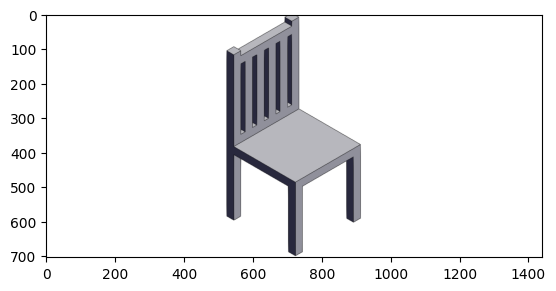

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/chair.png")
plt.imshow(im)

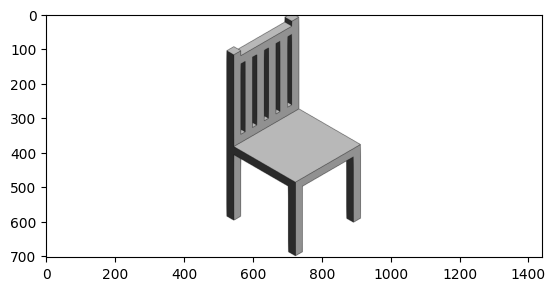

In [ ]:
grey_img = Image.open("/content/chair.png").convert('LA')
plt.imshow(grey_img)


In [ ]:
import numpy as np
from stl import mesh
# Define the 8 vertices of the cube
vertices = np.array([[-1, -1, -1], [+1, -1, -1], [+1, +1, -1], [-1, +1, -1]])
# Define the 12 triangles composing the cube
faces = np.array([[1,2,3], [3,1,0] ])
# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
  for j in range(3):
    cube.vectors[i][j] = vertices[f[j],:]
# Write the mesh to file "cube.stl"
cube.save('surface.stl')

In [ ]:
image_name = 'tofu.jpg'
grey_img = Image.open('/content/'+image_name).convert('L')
max_size=(500,500)
max_height=50
min_height=0
#height=0 for minPix
#height=maxHeight for maxPIx
grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()
print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    if pixelIntensity < 255:
      z = (pixelIntensity * max_height) / maxPix
    else :
      z = 0
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    z=0
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]
    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
  for j in range(3):
    surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save(image_name+'.stl')
print(surface)


[[ 82  78  73 ... 221 221 221]
 [ 80  76  72 ... 221 221 220]
 [ 80  75  71 ... 220 220 219]
 ...
 [134 130 131 ... 122 121 121]
 [133 129 131 ... 120 124 125]
 [132 131 131 ... 123 125 127]]
number of faces: 462074
<Mesh: '' 462074 vertices>
